In [41]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


university_df = pd.read_csv('university_admission.csv')
university_df

GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  Research  \
0          337          118                  4  4.5  4.5  9.65         1   
1          324          107                  4  4.0  4.5  8.87         1   
2          316          104                  3  3.0  3.5  8.00         1   
3          322          110                  3  3.5  2.5  8.67         1   
4          314          103                  2  2.0  3.0  8.21         0   
..         ...          ...                ...  ...  ...   ...       ...   
995        332          108                  5  4.5  4.0  9.02         1   
996        337          117                  5  5.0  5.0  9.87         1   
997        330          120                  5  4.5  5.0  9.56         1   
998        312          103                  4  4.0  5.0  8.43         0   
999        327          113                  4  4.5  4.5  9.04         0   

     Chance_of_Admission  
0                   0.92  
1                   0.76  
2                   0.72  
3                   0.80  
4                   0.65  
..                   ...  
995                 0.87  
996                 0.96  
997                 0.93  
998                 0.73  
999                 0.84  

[1000 rows x 8 columns]

In [ ]:
university_df.tail(6)

In [ ]:
university_df.columns

In [19]:
university_df.isnull().sum()

GRE_Score              0
TOEFL_Score            0
University_Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research               0
Chance_of_Admission    0
dtype: int64

In [ ]:
university_df.dtypes

In [2]:
university_df['TOEFL_Score'].describe()

count    1000.000000
mean      107.193000
std         6.079368
min        92.000000
25%       103.000000
50%       107.000000
75%       112.000000
max       120.000000
Name: TOEFL_Score, dtype: float64

TAREA PROGRAMACION N2: ANALISIS EXPLORATORIO DE DATOS

In [ ]:
sns.heatmap(university_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

In [ ]:
# Visualizar la distribución de los datos
university_df.hist(bins = 30, figsize = (20,20), color = 'r');
plt.show()

In [ ]:
# Visualizar la relación entre las variables
sns.pairplot(university_df)
plt.show()

In [ ]:
# Visualizar la correlación entre las variables
for i in university_df.columns:
    plt.figure(figsize=(13,7))
    sns.scatterplot(data=university_df, x=i, y='Chance_of_Admission', hue='University_Rating', hue_norm=(1,5))
    plt.show()


OPORTUNIDAD DE PRACTICA #2
- Representar la matriz de correlaciones
- Conectar la matriz de correlaciones

In [ ]:
corr_matriz = university_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matriz, annot=True)

TAREA DE PROGRAMACIÓN 3

In [3]:
# listar columnas
university_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

In [3]:
x = university_df.drop(['Chance_of_Admission'], axis = 1)
y = university_df['Chance_of_Admission']

x.shape, y.shape

((1000, 7), (1000,))

In [4]:
x = np.array(x)
y = np.array(y)

In [5]:
y=y.reshape(-1,1)   
y.shape

(1000, 1)

In [ ]:
#Escalar los datos antes de entrenar el modelo
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler_x = StandardScaler()
# x = scaler_x.fit_transform(x)
# scaler_y = StandardScaler()
# y = scaler_y.fit_transform(y)

OPORTUNIDAD DE PRÁCTICA N3
- Dividir los datos en un 25% de prueba y un 75% de entrenamiento
- Comprueba que la división se ha realizado correctamente obteniendo la dimenión de los conjuntos de datos de prueba y entrenamiento
- Por qué hemos comentado la celda de código de escalado de datos?

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape





((750, 7), (250, 7), (750, 1), (250, 1))

In [ ]:
# Entrenar un modelo de regresión  con XGBoost
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 2, alpha = 10, n_estimators = 100)
model.fit(x_train, y_train)

In [8]:
#Predecir la puntuación del modelo entrenado utilizando el conjunto de prueba
result = model.score(x_test, y_test)
#print("Accuracy: %.2f%%" % (result*100.0))
print("Accuracy: {}" .format(result))

Accuracy: 0.7122062903113882


In [9]:
#Realizar predicciones en el conjunto de pruebas
y_predict = model.predict(x_test)

In [ ]:
y_predict

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'.3f')) #Raíz del error cuadrático medio
MSE = mean_squared_error(y_test,y_predict) #Error cuadrático promedio
MAE = mean_absolute_error(y_test,y_predict) #Error promedio absoluto
r2 = r2_score(y_test,y_predict) #Coeficiente de determinación
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =',r2)

In [ ]:
#Comparar las predicciones con los valores reales
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Valores reales')
plt.plot(y_predict, label='Predicciones')
plt.ylabel('Chance_of_Admission')
plt.legend()
plt.show()

# RESUMEN DEL PROYECTO FINAL

- En este proyecto práctico, entrenaremos un modelo de Regresión Lineal para predecir la esperanza de vida.
- Estos datos se obtuvieron inicialmente de la Organización Mundial de la Salud (OMS) y del sitio web de las Naciones Unidas. Los datos contienen características como el año, el estado, la esperanza de vida, la mortalidad adulta, las muertes infantiles, el porcentaje de gasto, el alcohol, etc.



1.   Importar el conjunto de datos "Life_Expectancy_Data.csv" utilizando Pandas
2.   Comprueba si existen valores perdidos en los datos, realiza ingeniería de variables para eliminar o rellenar los valores perdidos
3.   ¿Cuál es el uso de memoria del DataFrame?
4. Enumera la esperanza de vida mínima, media y máxima
5. Representa el histograma, el diagrama de pares y el mapa de correlación para todas las características. 
6. Representa el diagrama de dispersión entre "Composición de ingresos de los recursos" y "Esperanza de vida", utilizando "estado" como atributo de color. Comenta el gráfico
7. Representa el diagrama de dispersión entre "Escolarización" y "Esperanza de vida", utiliza "estado" como atributo de color. Comenta el gráfico de dispersión. 
8. Divide los datos en un 80% para entrenamiento y un 20% para pruebas.
9. Entrena un algoritmo XG-boost.
10. Evalúa el rendimiento del modelo de regresión entrenado, ¿cuál es R2?
11. Representa gráficamente las predicciones del modelo entrenado frente al resultado real.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

life_expectancy_df = pd.read_csv('Life_Expectancy_Data.csv')
life_expectancy_df

Year      Status  Life expectancy   Adult Mortality  infant deaths  \
0     2015  Developing              65.0            263.0             62   
1     2014  Developing              59.9            271.0             64   
2     2013  Developing              59.9            268.0             66   
3     2012  Developing              59.5            272.0             69   
4     2011  Developing              59.2            275.0             71   
...    ...         ...               ...              ...            ...   
2933  2004  Developing              44.3            723.0             27   
2934  2003  Developing              44.5            715.0             26   
2935  2002  Developing              44.8             73.0             25   
2936  2001  Developing              45.3            686.0             25   
2937  2000  Developing              46.0            665.0             24   

      Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0        0.01               71.279624         65.0      1154   19.1  ...   
1        0.01               73.523582         62.0       492   18.6  ...   
2        0.01               73.219243         64.0       430   18.1  ...   
3        0.01               78.184215         67.0      2787   17.6  ...   
4        0.01                7.097109         68.0      3013   17.2  ...   
...       ...                     ...          ...       ...    ...  ...   
2933     4.36                0.000000         68.0        31   27.1  ...   
2934     4.06                0.000000          7.0       998   26.7  ...   
2935     4.43                0.000000         73.0       304   26.3  ...   
2936     1.72                0.000000         76.0       529   25.9  ...   
2937     1.68                0.000000         79.0      1483   25.5  ...   

      Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0       6.0               8.16         65.0        0.1  584.259210   
1      58.0               8.18         62.0        0.1  612.696514   
2      62.0               8.13         64.0        0.1  631.744976   
3      67.0               8.52         67.0        0.1  669.959000   
4      68.0               7.87         68.0        0.1   63.537231   
...     ...                ...          ...        ...         ...   
2933   67.0               7.13         65.0       33.6  454.366654   
2934    7.0               6.52         68.0       36.7  453.351155   
2935   73.0               6.53         71.0       39.8   57.348340   
2936   76.0               6.16         75.0       42.1  548.587312   
2937   78.0               7.10         78.0       43.5  547.358879   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937     

<Axes: >

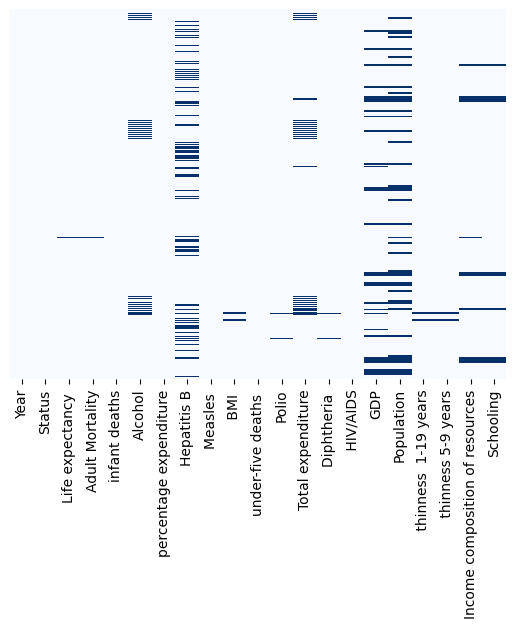

In [2]:
#life_expectancy_df.isnull().sum()
sns.heatmap(life_expectancy_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [44]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [21]:
life_expectancy_df.dropna(inplace=True,how='any')
life_expectancy_df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [31]:
life_expectancy_df['Life expectancy '].describe()

count    1649.000000
mean       69.302304
std         8.796834
min        44.000000
25%        64.400000
50%        71.700000
75%        75.000000
max        89.000000
Name: Life expectancy , dtype: float64

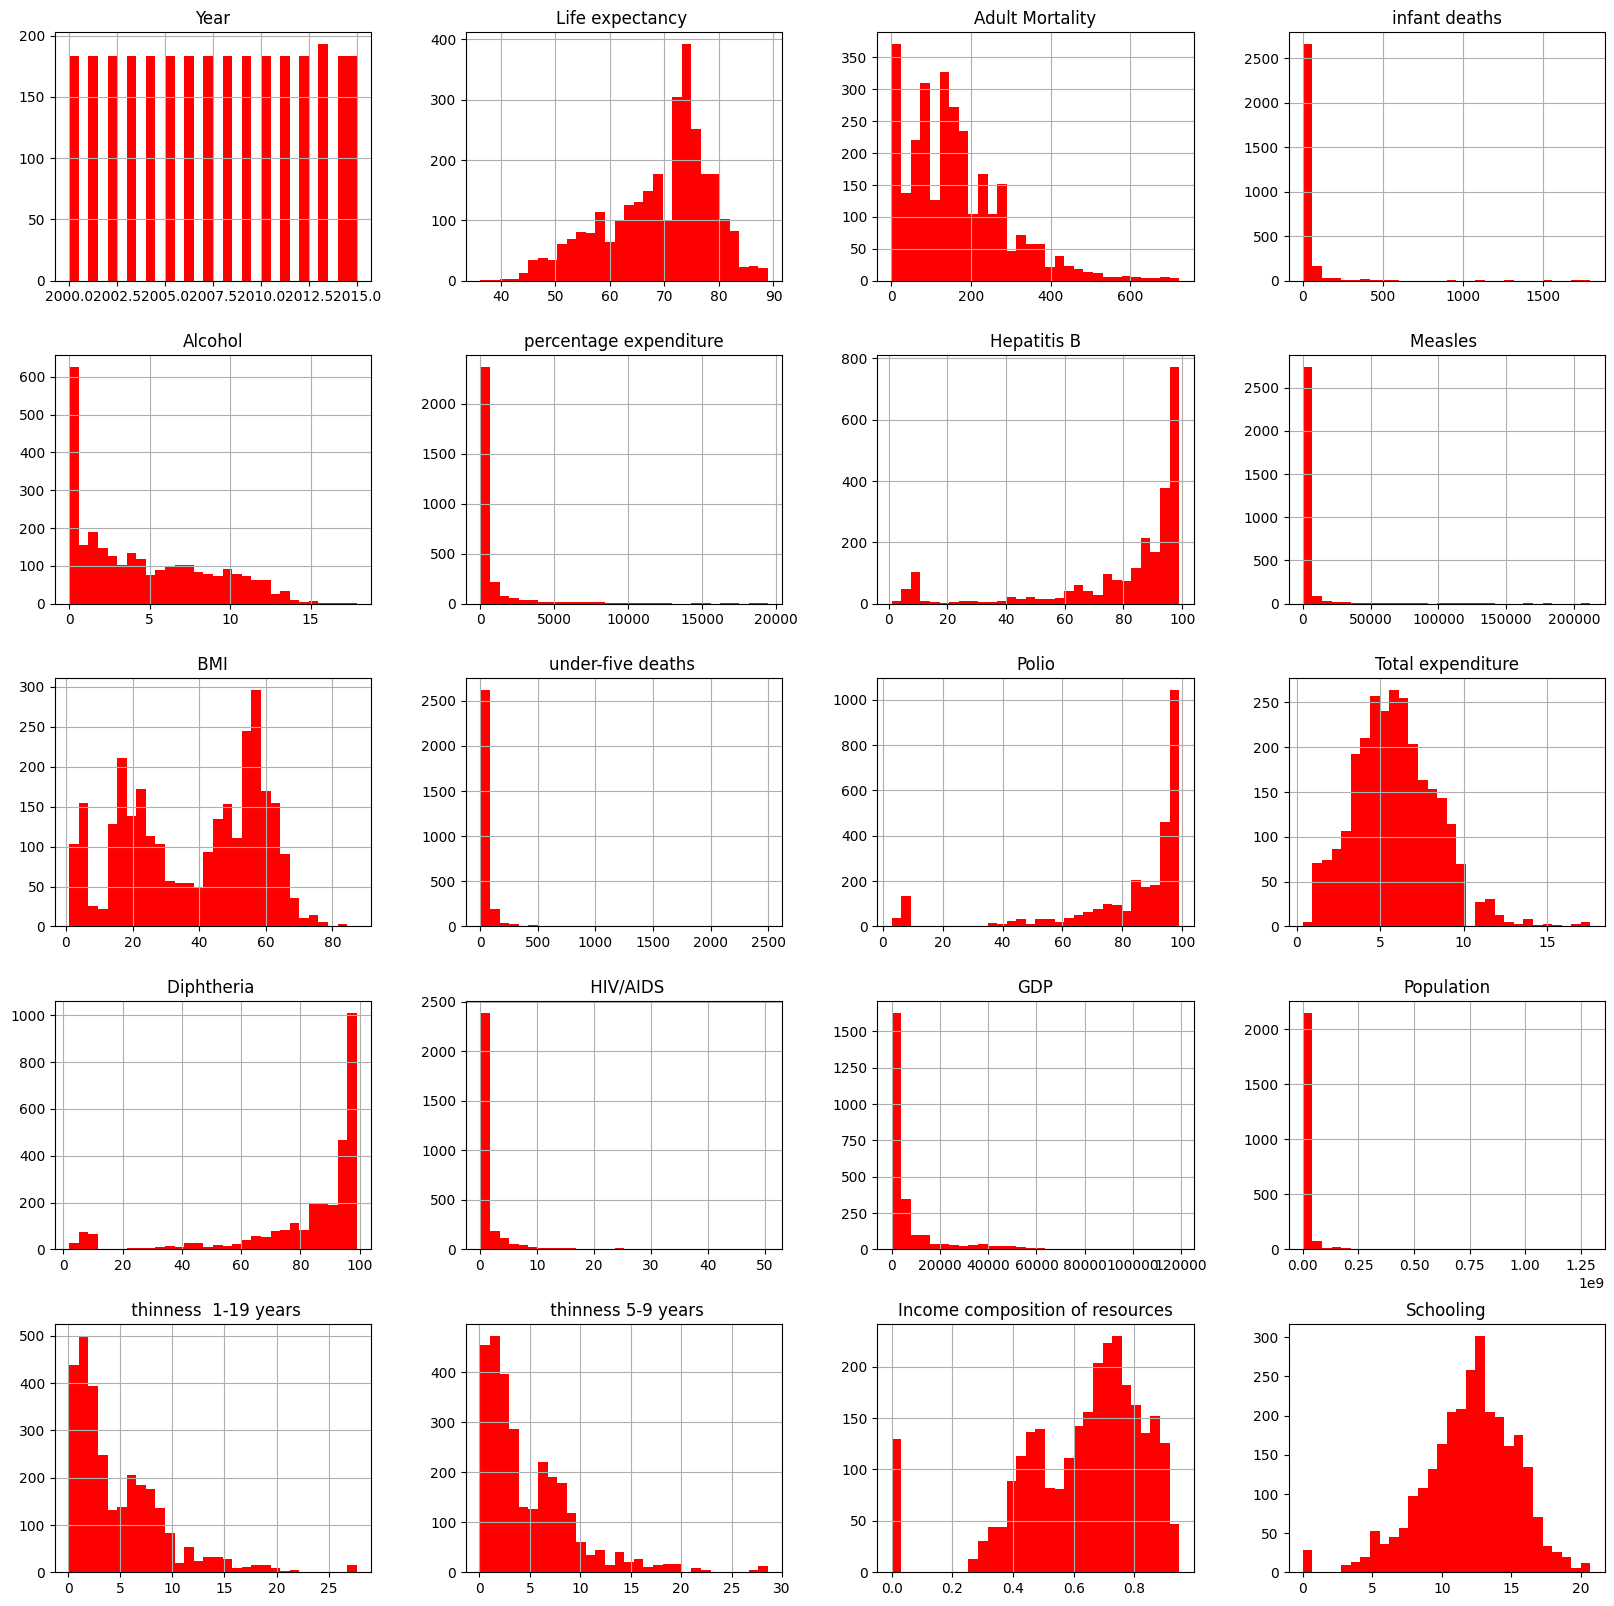

In [46]:
num_bins = 30
life_expectancy_df.hist(bins=num_bins, figsize=(20,20), color='r')
plt.grid()
plt.show()

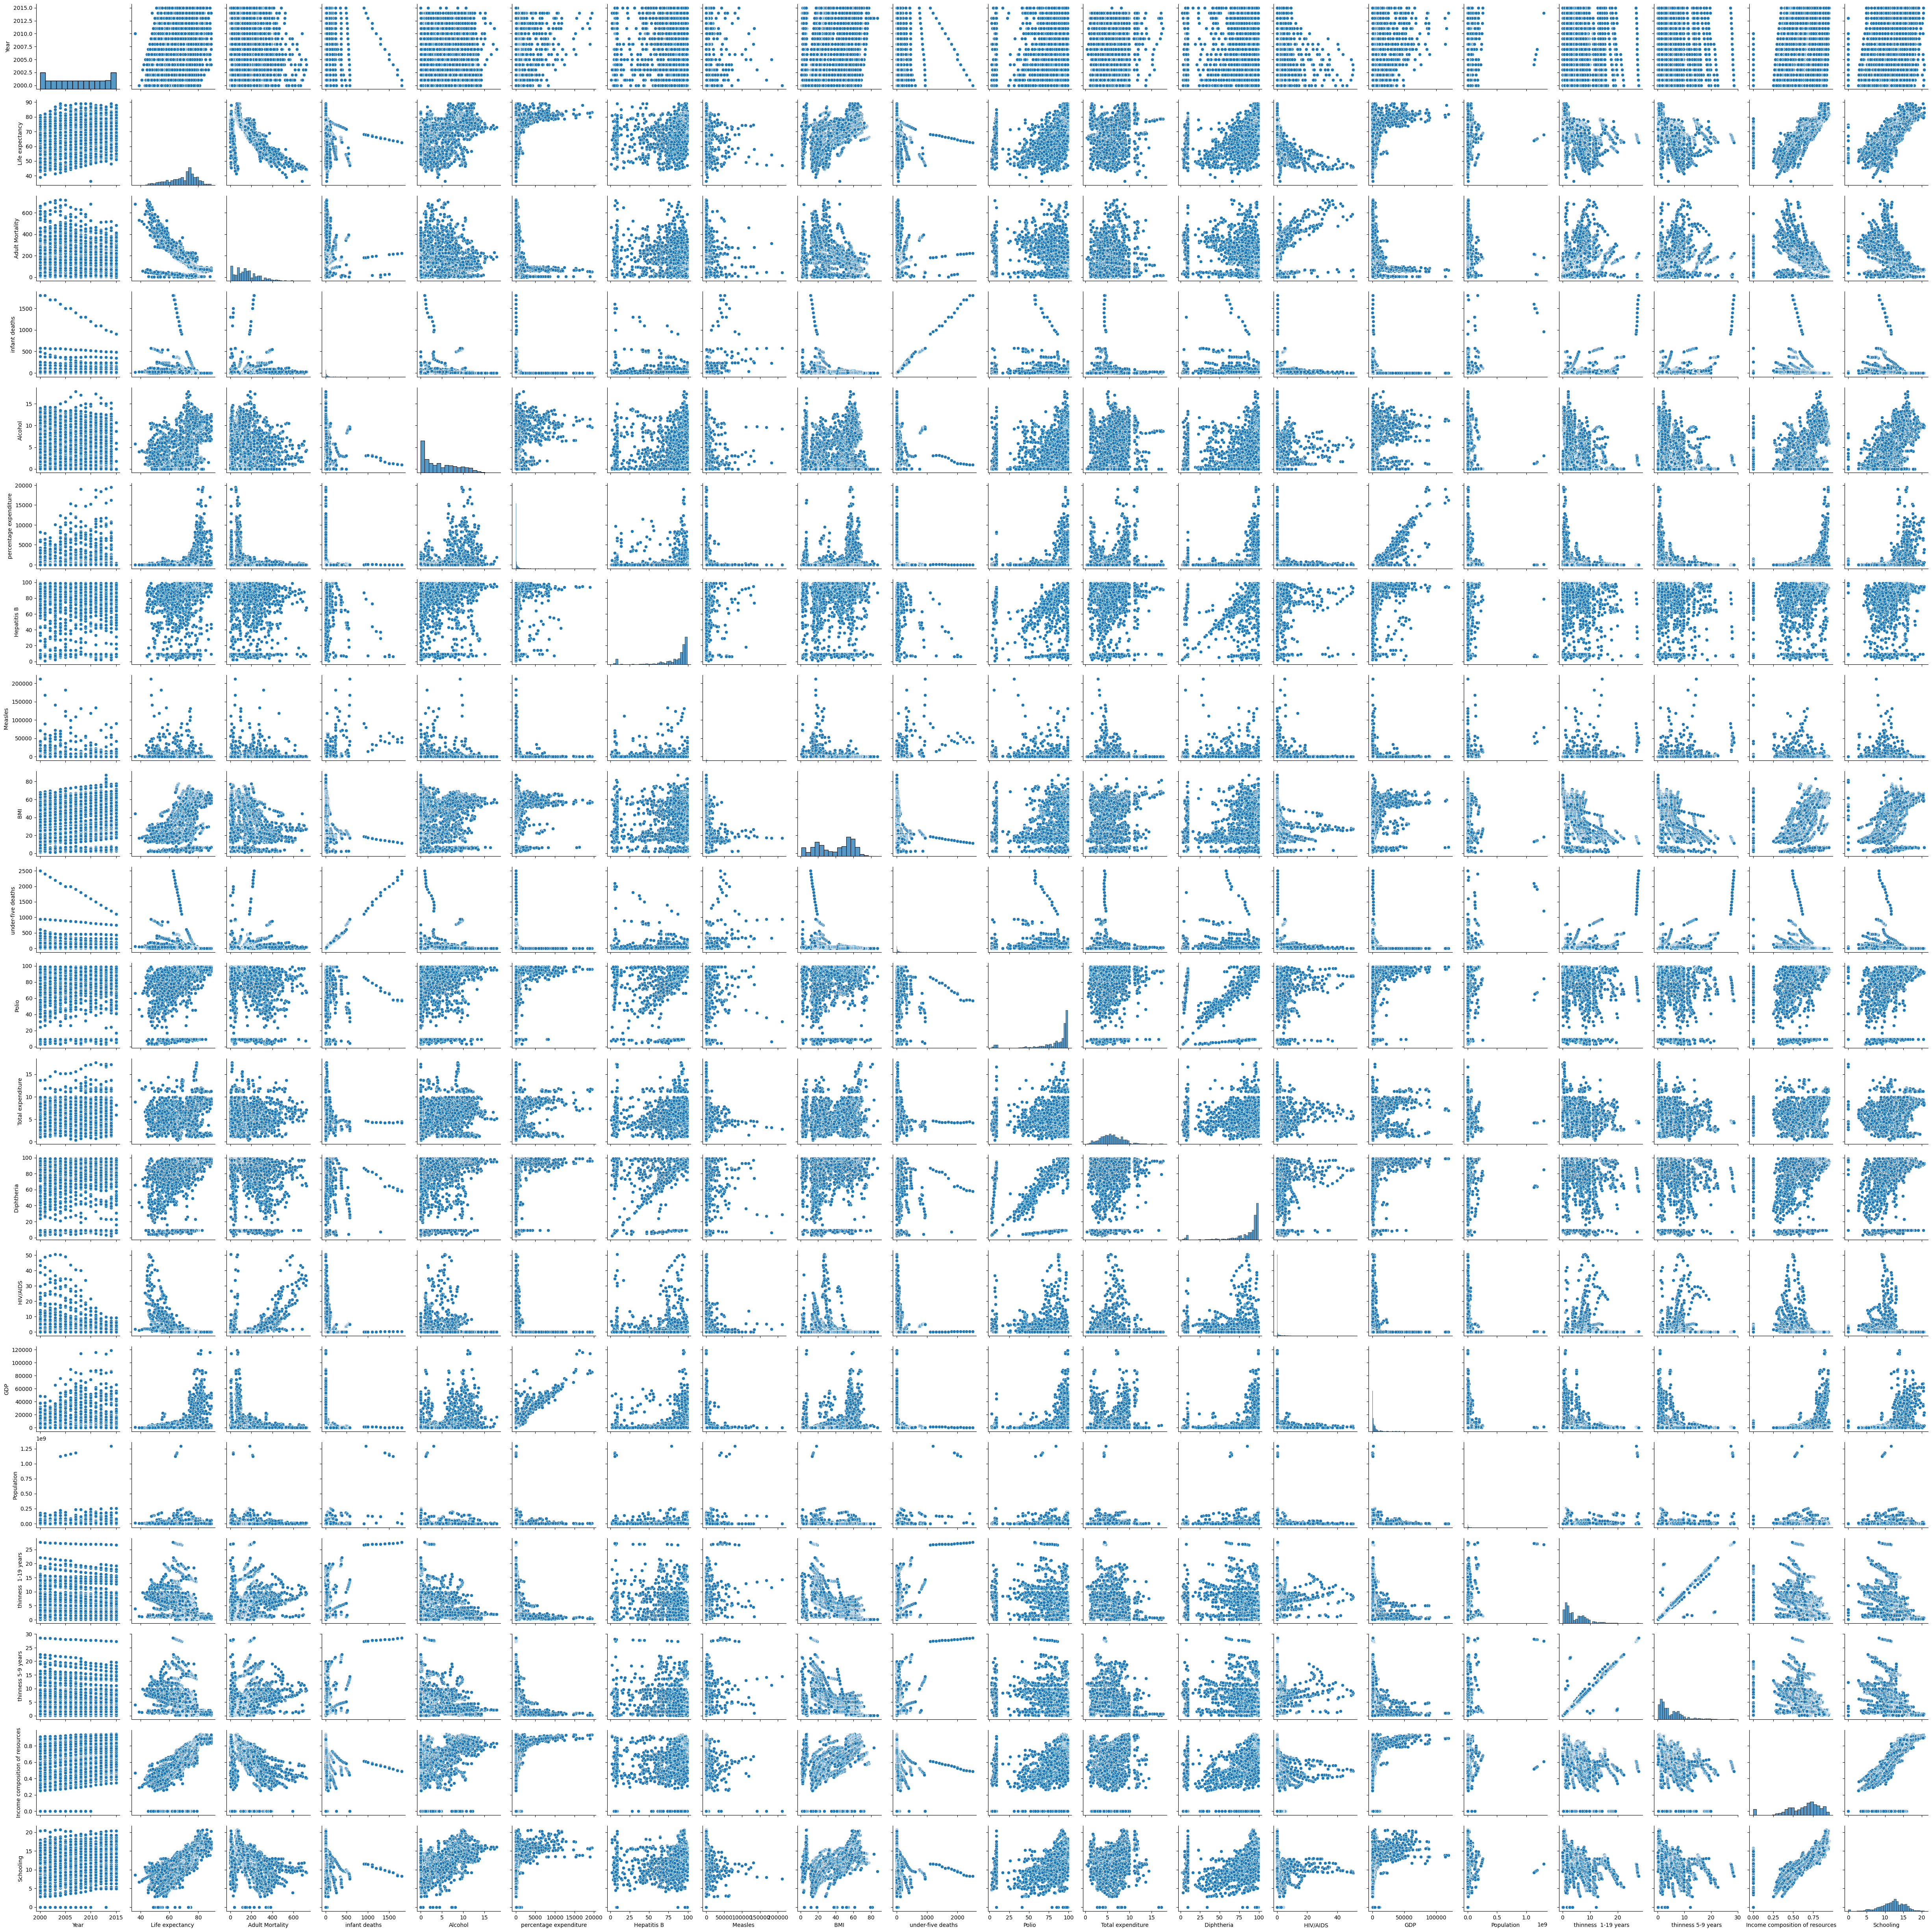

<Figure size 2000x2000 with 0 Axes>

In [47]:
sns.pairplot(life_expectancy_df)
plt.figure(figsize=(20,20))
plt.show()

<Axes: xlabel='Income composition of resources', ylabel='Life expectancy '>

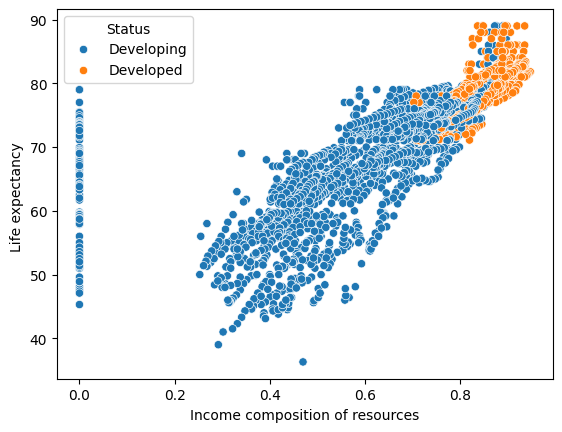

In [48]:
sns.scatterplot(data=life_expectancy_df, x='Income composition of resources', y='Life expectancy ', hue='Status')

<Axes: xlabel='Schooling', ylabel='Life expectancy '>

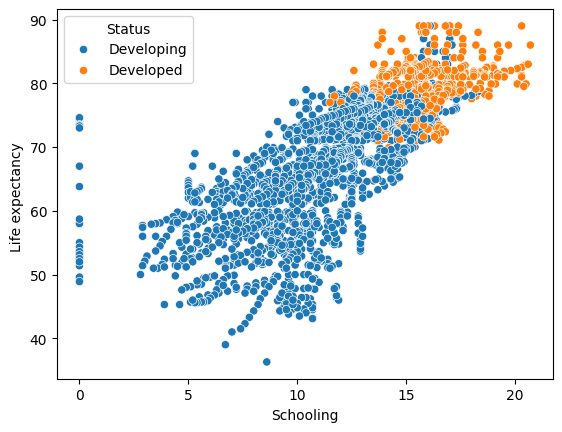

In [ ]:
sns.scatterplot(data=life_expectancy_df, x='Schooling', y='Life expectancy ', hue='Status')

<Axes: >

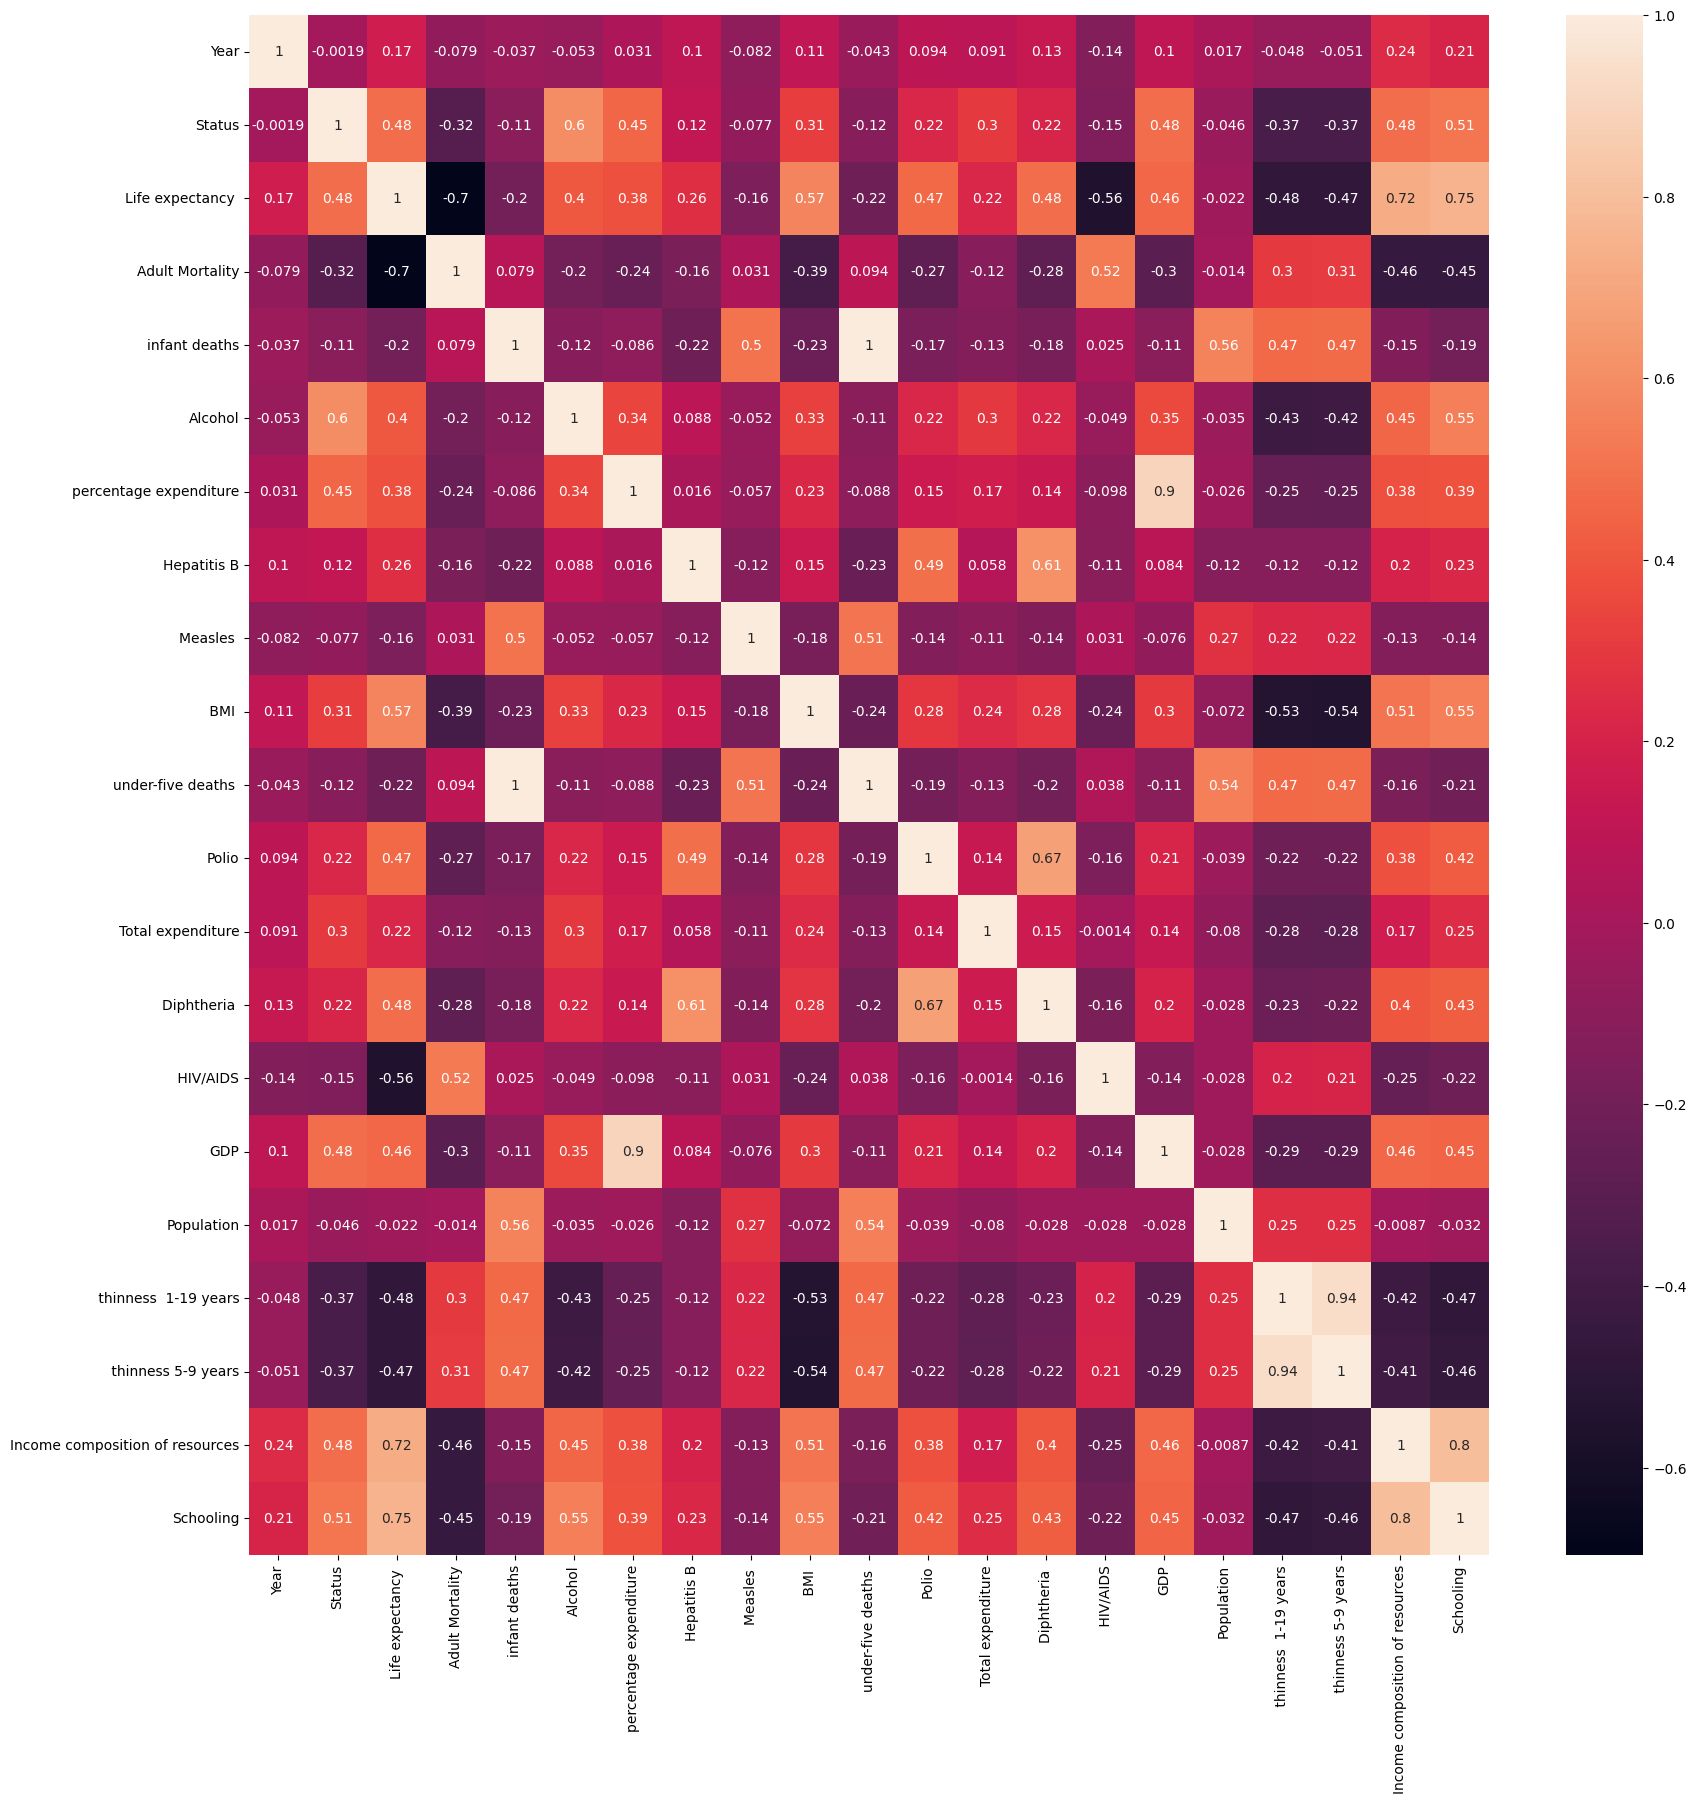

In [51]:
life_expectancy_df['Status'] = life_expectancy_df['Status'].map({'Developing': 0, 'Developed': 1})
plt.figure(figsize=(20,20))
corr_matriz = life_expectancy_df.corr()
sns.heatmap(corr_matriz, annot=True)

In [60]:
life_expectancy_df['Status'].nunique()
life_expectancy_df = pd.get_dummies(life_expectancy_df, columns = ['Status'])
life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]
life_expectancy_df = life_expectancy_df.apply(lambda x: x.fillna(x.mean()),axis=0)
life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]

/tmp/ipykernel_12770/4017142495.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]
/tmp/ipykernel_12770/4017142495.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  life_expectancy_df.isnull().sum()[np.where(life_expectancy_df.isnull().sum() != 0)[0]]


Series([], dtype: int64)

In [61]:
X = life_expectancy_df.drop(columns = ['Life expectancy '])
y = life_expectancy_df[['Life expectancy ']]
X.shape, y.shape

((2938, 21), (2938, 1))

In [62]:
x = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2350, 21), (588, 21), (2350, 1), (588, 1))

In [64]:
from sklearn.metrics import mean_squared_error, accuracy_score
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1,
                max_depth = 30, n_estimators = 100, col_sample_bytree = 0.3, alpha = 10)
model.fit(x_train, y_train)

/home/paul/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:57:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "col_sample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             col_sample_bytree=0.3, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=30,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, ...)

In [65]:
model_accuracy = model.score(x_test, y_test)
model_accuracy

0.9667798280715942

In [66]:
y_predict = model.predict(x_test)
y_predict

array([72.99758 , 75.50604 , 75.35919 , 75.85321 , 54.726376, 51.19938 ,
       67.48666 , 74.54739 , 76.57389 , 55.52396 , 51.928635, 52.92292 ,
       55.6284  , 72.521416, 68.91434 , 61.92191 , 60.153477, 82.773026,
       71.12067 , 78.03383 , 81.279076, 84.6302  , 72.26027 , 68.61132 ,
       71.606224, 68.23573 , 57.927776, 66.5144  , 81.84153 , 74.06197 ,
       67.97488 , 74.35963 , 73.777626, 71.87273 , 78.04888 , 50.018528,
       61.27572 , 71.63963 , 63.956608, 74.415344, 54.27388 , 60.841682,
       75.45465 , 81.07971 , 76.614075, 48.909218, 80.535835, 73.77744 ,
       62.06661 , 71.709465, 51.16328 , 69.95875 , 81.66986 , 81.01179 ,
       74.605385, 60.765266, 72.82975 , 73.05244 , 62.7475  , 69.36803 ,
       77.96293 , 54.352814, 74.69552 , 73.43518 , 50.931637, 55.08115 ,
       52.226536, 77.232445, 60.53372 , 70.10268 , 83.849945, 78.477425,
       73.61357 , 53.28523 , 54.588142, 68.02125 , 64.349915, 75.3301  ,
       55.8537  , 63.912415, 63.26436 , 61.606808, 

In [67]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = x_test.shape[1]
n = len(x_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 1.696 
MSE = 2.8780384063720703 
MAE = 1.1427996158599854 
R2 = 0.9667798280715942 
Adjusted R2 = 0.9655472775230138


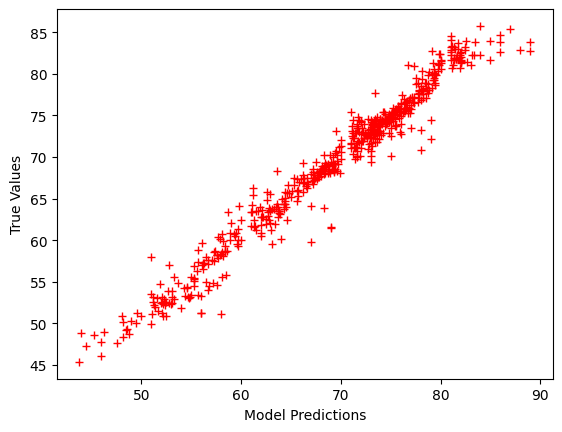

In [70]:
plt.plot(y_test, y_predict, "+", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.show()